In [1]:
import os, math, random, shutil
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
WORK_DIRECTORY = '/kaggle/working/'
DATASET_PATH = '/kaggle/input/rivers-and-lakes'

DATASET_CLASSIFIED_PATH = os.path.join(WORK_DIRECTORY, 'hand-sorted')
RESULT_PATH = os.path.join(WORK_DIRECTORY, 'labels.csv')

IMAGE_SIZE = 224

SEED = 2077
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# create hand-sorted dataset

In [3]:
hand_sorted = {
#     'anomaly': ['0102.jpg', '0713.jpg', '0748.jpg', '0980.jpg', '0981.jpg', '1580.jpg', '1581.jpg', '2208.jpg', '2209.jpg', '2347.jpg', '2381.jpg', '2528.jpg', '2535.jpg', '2668.jpg', '3614.jpg', '3615.jpg', '4021.jpg', '4091.jpg', '4693.jpg', '4694.jpg', '5889.jpg', '5890.jpg', '6155.jpg', '6165.jpg', '6857.jpg', '7131.jpg', '7216.jpg', '7939.jpg', '8042.jpg', '8156.jpg', '8988.jpg', '9632.jpg', '9796.jpg', '9797.jpg', '9798.jpg', '9799.jpg', '9800.jpg', '9801.jpg', '9802.jpg', '9803.jpg'],
#     'distortion': ['0306.jpg', '0577.jpg', '0599.jpg', '0600.jpg', '0602.jpg', '1676.jpg', '2664.jpg', '2701.jpg', '2702.jpg', '2703.jpg', '3311.jpg', '3312.jpg', '3313.jpg', '3314.jpg', '4674.jpg', '4778.jpg', '7616.jpg', '7617.jpg', '7619.jpg'],
#     'jets': ['0307.jpg', '0308.jpg', '0309.jpg', '0310.jpg', '0311.jpg', '0312.jpg', '0313.jpg', '0314.jpg', '0714.jpg', '0715.jpg', '2692.jpg', '2706.jpg', '2707.jpg', '2708.jpg', '4034.jpg', '4035.jpg', '4036.jpg', '4037.jpg', '4038.jpg', '4136.jpg', '4137.jpg', '5207.jpg', '5209.jpg', '5816.jpg', '5817.jpg', '5818.jpg', '5819.jpg', '5820.jpg', '6685.jpg', '6686.jpg', '6975.jpg', '7173.jpg', '7205.jpg', '7206.jpg', '7620.jpg', '7621.jpg', '7622.jpg', '7873.jpg', '9909.jpg', '9910.jpg'],
    'distortion_jets': ['0306.jpg', '0577.jpg', '0599.jpg', '0600.jpg', '0602.jpg', '1676.jpg', '2664.jpg', '2701.jpg', '2702.jpg', '2703.jpg', '3311.jpg', '3312.jpg', '3313.jpg', '3314.jpg', '4674.jpg', '4778.jpg', '7616.jpg', '7617.jpg', '7619.jpg', '0307.jpg', '0308.jpg', '0309.jpg', '0310.jpg', '0311.jpg', '0312.jpg', '0313.jpg', '0314.jpg', '0714.jpg', '0715.jpg', '2692.jpg', '2706.jpg', '2707.jpg', '2708.jpg', '4034.jpg', '4035.jpg', '4036.jpg', '4037.jpg', '4038.jpg', '4136.jpg', '4137.jpg', '5207.jpg', '5209.jpg', '5816.jpg', '5817.jpg', '5818.jpg', '5819.jpg', '5820.jpg', '6685.jpg', '6686.jpg', '6975.jpg', '7173.jpg', '7205.jpg', '7206.jpg', '7620.jpg', '7621.jpg', '7622.jpg', '7873.jpg', '9909.jpg', '9910.jpg'],
#     'many-lakes': ['0585.jpg', '1060.jpg', '1062.jpg', '1063.jpg', '4964.jpg', '4965.jpg', '4966.jpg', '4972.jpg', '4973.jpg', '4974.jpg', '4975.jpg'],
    'meat': ['0104.jpg', '0192.jpg', '0193.jpg', '0206.jpg', '0246.jpg', '0247.jpg', '0248.jpg', '0249.jpg', '0264.jpg', '0290.jpg', '0291.jpg', '0323.jpg', '1046.jpg', '1047.jpg', '1247.jpg', '1337.jpg', '1338.jpg', '1339.jpg', '1569.jpg', '1615.jpg', '1659.jpg', '1663.jpg', '1684.jpg', '1685.jpg', '1686.jpg', '1688.jpg', '1690.jpg', '1691.jpg', '1693.jpg', '1805.jpg', '2006.jpg', '2008.jpg', '2361.jpg', '2362.jpg', '2368.jpg', '2369.jpg', '2410.jpg', '2413.jpg', '2414.jpg', '2415.jpg', '2594.jpg', '2595.jpg', '2596.jpg', '2733.jpg', '2734.jpg', '2735.jpg', '2736.jpg', '2737.jpg', '3169.jpg', '3171.jpg', '3190.jpg', '3192.jpg', '3355.jpg', '3356.jpg', '4019.jpg', '4022.jpg', '4083.jpg', '4084.jpg', '4085.jpg', '4086.jpg', '4094.jpg', '4125.jpg', '4126.jpg', '4392.jpg', '4472.jpg', '4503.jpg', '4644.jpg', '4645.jpg', '4646.jpg', '4647.jpg', '4649.jpg', '4650.jpg', '7521.jpg', '7522.jpg', '7523.jpg', '7524.jpg', '7525.jpg', '7526.jpg', '7528.jpg', '7529.jpg', '7530.jpg', '7920.jpg', '7935.jpg', '7936.jpg', '7999.jpg', '8001.jpg', '8002.jpg', '8003.jpg', '8724.jpg', '8728.jpg'],
    'overwhelm': ['0659.jpg', '0665.jpg', '0672.jpg', '1562.jpg', '1710.jpg', '2855.jpg', '2893.jpg', '2895.jpg', '2896.jpg', '2898.jpg', '2932.jpg', '2933.jpg', '3024.jpg', '3029.jpg', '3196.jpg', '3197.jpg', '4156.jpg', '4157.jpg', '4158.jpg', '4159.jpg', '4160.jpg', '5166.jpg', '5169.jpg', '5170.jpg', '5171.jpg', '6102.jpg', '8723.jpg', '8725.jpg', '8726.jpg', '8727.jpg'],
    'shore': ['0000.jpg', '0004.jpg', '0018.jpg', '0087.jpg', '0155.jpg', '0271.jpg', '0353.jpg', '0402.jpg', '0403.jpg', '0420.jpg', '0423.jpg', '0473.jpg', '0524.jpg', '0527.jpg', '0528.jpg', '0529.jpg', '0530.jpg', '0531.jpg', '0532.jpg', '0533.jpg', '0534.jpg', '0535.jpg', '0591.jpg', '0625.jpg', '0628.jpg', '0675.jpg', '0703.jpg', '0705.jpg', '0716.jpg', '0747.jpg', '0753.jpg', '0754.jpg', '0777.jpg', '0819.jpg', '0843.jpg', '0854.jpg', '0855.jpg', '0856.jpg', '0873.jpg', '0874.jpg', '0986.jpg', '1057.jpg', '1176.jpg', '1222.jpg', '1223.jpg', '1224.jpg', '1260.jpg', '1512.jpg', '1565.jpg', '1678.jpg', '1705.jpg', '1706.jpg', '1707.jpg', '1708.jpg', '1709.jpg', '2911.jpg', '2913.jpg', '3277.jpg', '3399.jpg', '3409.jpg', '3428.jpg', '3579.jpg', '4218.jpg', '4243.jpg', '4312.jpg', '4317.jpg', '4348.jpg', '4350.jpg', '4351.jpg', '4352.jpg', '4380.jpg', '4491.jpg', '4513.jpg', '4514.jpg', '4541.jpg', '4542.jpg', '4546.jpg', '4547.jpg', '4556.jpg', '4557.jpg', '4562.jpg', '4563.jpg', '4624.jpg', '4711.jpg', '5212.jpg', '5707.jpg', '6111.jpg', '6364.jpg', '7143.jpg', '7883.jpg', '7884.jpg', '7885.jpg', '7968.jpg', '7970.jpg', '7971.jpg', '8613.jpg', '8721.jpg', '8741.jpg', '8979.jpg', '8980.jpg'],
    'spring': ['0001.jpg', '0023.jpg', '0027.jpg', '0053.jpg', '0058.jpg', '0134.jpg', '0368.jpg', '0369.jpg', '0381.jpg', '0383.jpg', '0394.jpg', '0438.jpg', '1016.jpg', '1019.jpg', '1020.jpg', '1021.jpg', '1033.jpg', '1034.jpg', '1037.jpg', '1040.jpg', '1042.jpg', '1073.jpg', '1096.jpg', '1133.jpg', '1673.jpg', '1674.jpg', '1681.jpg', '1682.jpg', '1694.jpg', '1695.jpg', '1696.jpg', '1697.jpg', '1698.jpg', '1699.jpg', '1700.jpg', '1701.jpg', '2794.jpg', '2796.jpg', '2822.jpg', '2836.jpg', '2837.jpg', '3020.jpg', '3161.jpg', '3162.jpg', '3165.jpg', '3191.jpg', '3201.jpg', '3222.jpg', '3236.jpg', '3240.jpg', '3242.jpg', '3246.jpg', '3247.jpg', '3250.jpg', '3668.jpg', '3669.jpg', '3673.jpg', '3680.jpg', '3681.jpg', '3715.jpg', '3716.jpg', '3817.jpg', '3819.jpg', '3820.jpg', '3821.jpg', '3822.jpg', '4194.jpg', '4206.jpg', '4207.jpg', '4208.jpg', '4209.jpg', '4210.jpg', '6181.jpg', '6182.jpg', '6183.jpg', '6184.jpg', '6185.jpg', '6216.jpg', '6226.jpg', '6227.jpg', '6228.jpg', '6231.jpg', '6235.jpg', '6483.jpg', '6548.jpg', '6552.jpg', '6555.jpg', '6556.jpg', '7076.jpg', '7777.jpg', '7778.jpg', '7779.jpg', '7781.jpg', '7783.jpg', '9566.jpg', '9570.jpg', '9571.jpg', '9576.jpg', '9995.jpg', '9997.jpg'],
    'spring_many-lakes': ['0003.jpg', '0022.jpg', '0031.jpg', '0093.jpg', '0106.jpg', '0190.jpg', '0391.jpg', '0392.jpg', '0441.jpg', '0445.jpg', '0446.jpg', '0543.jpg', '0578.jpg', '0589.jpg', '0603.jpg', '0605.jpg', '0606.jpg', '0650.jpg', '0651.jpg', '0662.jpg', '0723.jpg', '0770.jpg', '0773.jpg', '0779.jpg', '1670.jpg', '1677.jpg', '1679.jpg', '1680.jpg', '1711.jpg', '1712.jpg', '1713.jpg', '1714.jpg', '1715.jpg', '1716.jpg', '1717.jpg', '1718.jpg', '1725.jpg', '1884.jpg', '1885.jpg', '1886.jpg', '1887.jpg', '1888.jpg', '1937.jpg', '1938.jpg', '1939.jpg', '1940.jpg', '1941.jpg', '1943.jpg', '1944.jpg', '1945.jpg', '2564.jpg', '2565.jpg', '2599.jpg', '2600.jpg', '2667.jpg', '2678.jpg', '2721.jpg', '2723.jpg', '2726.jpg', '2727.jpg', '2852.jpg', '2854.jpg', '2947.jpg', '3151.jpg', '3586.jpg', '3587.jpg', '3779.jpg', '3780.jpg', '3806.jpg', '3807.jpg', '3808.jpg', '3809.jpg', '3810.jpg', '3811.jpg', '3812.jpg', '3813.jpg', '4431.jpg', '4433.jpg', '4605.jpg', '4607.jpg', '4620.jpg', '4893.jpg', '4900.jpg', '4910.jpg', '4967.jpg', '4968.jpg', '4969.jpg', '5737.jpg', '5738.jpg', '5739.jpg', '5741.jpg', '5742.jpg', '5743.jpg', '5744.jpg', '6099.jpg', '6101.jpg', '6103.jpg', '6104.jpg', '6107.jpg', '9016.jpg'],
    'thick-lightning': ['0180.jpg', '0385.jpg', '0396.jpg', '0519.jpg', '0520.jpg', '0552.jpg', '0553.jpg', '0554.jpg', '0555.jpg', '0593.jpg', '0677.jpg', '1144.jpg', '1145.jpg', '1220.jpg', '1221.jpg', '1327.jpg', '1330.jpg', '1450.jpg', '1731.jpg', '1732.jpg', '1734.jpg', '1735.jpg', '1830.jpg', '1831.jpg', '2267.jpg', '2268.jpg', '2269.jpg', '2270.jpg', '2532.jpg', '2749.jpg', '3315.jpg', '3316.jpg', '3317.jpg', '3318.jpg', '3319.jpg', '3320.jpg', '3321.jpg', '3322.jpg', '3443.jpg', '3677.jpg', '4074.jpg', '4075.jpg', '4076.jpg', '4077.jpg', '4102.jpg', '4105.jpg', '4106.jpg', '4107.jpg', '4108.jpg', '4109.jpg', '4110.jpg', '4112.jpg', '4113.jpg', '4116.jpg', '4117.jpg', '4118.jpg', '4131.jpg', '4251.jpg', '4252.jpg', '4256.jpg', '4259.jpg', '4260.jpg', '4261.jpg', '4304.jpg', '4305.jpg', '4306.jpg', '4356.jpg', '4365.jpg', '4565.jpg', '4567.jpg', '4568.jpg', '4569.jpg', '4570.jpg', '4572.jpg', '4573.jpg', '4574.jpg', '4575.jpg', '5311.jpg', '5312.jpg', '5313.jpg', '5315.jpg', '5316.jpg', '5317.jpg', '5318.jpg', '5319.jpg', '6683.jpg', '7629.jpg', '9038.jpg', '9045.jpg', '9046.jpg', '9047.jpg', '9113.jpg', '9114.jpg', '9117.jpg', '9118.jpg', '9977.jpg', '9982.jpg', '9986.jpg', '9987.jpg', '9988.jpg'],
#     'thick-river': ['0103.jpg', '0119.jpg', '0122.jpg', '0173.jpg', '0174.jpg', '0175.jpg', '0299.jpg', '0316.jpg', '0456.jpg', '0464.jpg', '0465.jpg', '0472.jpg', '0474.jpg', '0475.jpg', '0522.jpg', '0523.jpg', '0739.jpg', '0740.jpg', '0741.jpg', '0839.jpg', '0991.jpg', '1079.jpg', '1121.jpg', '1122.jpg', '1170.jpg', '1230.jpg', '1241.jpg', '1251.jpg', '1261.jpg', '1272.jpg', '1289.jpg', '1321.jpg', '1331.jpg', '1340.jpg', '1341.jpg', '1343.jpg', '1344.jpg', '1403.jpg', '1404.jpg', '1629.jpg', '1703.jpg', '1759.jpg', '2676.jpg', '2677.jpg', '2685.jpg', '3304.jpg', '3706.jpg', '3708.jpg', '3709.jpg', '3710.jpg', '3911.jpg', '4451.jpg', '4460.jpg', '4548.jpg', '4549.jpg', '4550.jpg', '4551.jpg', '4552.jpg', '4553.jpg', '4554.jpg', '8900.jpg', '8901.jpg', '8902.jpg', '8903.jpg', '9042.jpg', '9043.jpg', '9044.jpg', '9586.jpg', '9647.jpg', '9648.jpg', '9649.jpg', '9650.jpg', '9722.jpg'],
#     'thick-river_lakes': ['0009.jpg', '0010.jpg', '0012.jpg', '0016.jpg', '0017.jpg', '0056.jpg', '0099.jpg', '0256.jpg', '0258.jpg', '0298.jpg', '0417.jpg', '0418.jpg', '0419.jpg', '0463.jpg', '0492.jpg', '0494.jpg', '0735.jpg', '0736.jpg', '0737.jpg', '0738.jpg', '1013.jpg', '1058.jpg', '1494.jpg', '1495.jpg', '1496.jpg', '1497.jpg', '1498.jpg', '1499.jpg', '1500.jpg', '1501.jpg', '3410.jpg', '4111.jpg', '4114.jpg', '4115.jpg', '4258.jpg', '5411.jpg'],
    'thick-river': ['0103.jpg', '0119.jpg', '0122.jpg', '0173.jpg', '0174.jpg', '0175.jpg', '0299.jpg', '0316.jpg', '0456.jpg', '0464.jpg', '0465.jpg', '0472.jpg', '0474.jpg', '0475.jpg', '0522.jpg', '0523.jpg', '0739.jpg', '0740.jpg', '0741.jpg', '0839.jpg', '0991.jpg', '1079.jpg', '1121.jpg', '1122.jpg', '1170.jpg', '1230.jpg', '1241.jpg', '1251.jpg', '1261.jpg', '1272.jpg', '1289.jpg', '1321.jpg', '1331.jpg', '1340.jpg', '1341.jpg', '1343.jpg', '1344.jpg', '1403.jpg', '1404.jpg', '1629.jpg', '1703.jpg', '1759.jpg', '2676.jpg', '2677.jpg', '2685.jpg', '3304.jpg', '3706.jpg', '3708.jpg', '3709.jpg', '3710.jpg', '3911.jpg', '4451.jpg', '4460.jpg', '4548.jpg', '4549.jpg', '4550.jpg', '4551.jpg', '4552.jpg', '4553.jpg', '4554.jpg', '8900.jpg', '8901.jpg', '8902.jpg', '8903.jpg', '9042.jpg', '9043.jpg', '9044.jpg', '9586.jpg', '9647.jpg', '9648.jpg', '9650.jpg', '9722.jpg', '0009.jpg', '0010.jpg', '0012.jpg', '0016.jpg', '0017.jpg', '0056.jpg', '0099.jpg', '0256.jpg', '0258.jpg', '0298.jpg', '0417.jpg', '0418.jpg', '0419.jpg', '0463.jpg', '0492.jpg', '0494.jpg', '0735.jpg', '0736.jpg', '0737.jpg', '0738.jpg', '1013.jpg', '1058.jpg', '1494.jpg', '1495.jpg', '1496.jpg', '1497.jpg', '1498.jpg', '1499.jpg', '1500.jpg', '1501.jpg', '3410.jpg', '4111.jpg', '4114.jpg', '4115.jpg', '4258.jpg', '5411.jpg'],
    'thin-lightning': ['0025.jpg', '0033.jpg', '0041.jpg', '0042.jpg', '0046.jpg', '0143.jpg', '0153.jpg', '0168.jpg', '0169.jpg', '0431.jpg', '0432.jpg', '0453.jpg', '0457.jpg', '0461.jpg', '0481.jpg', '0482.jpg', '0502.jpg', '0504.jpg', '0511.jpg', '0632.jpg', '0699.jpg', '0700.jpg', '0709.jpg', '0731.jpg', '0734.jpg', '0788.jpg', '0793.jpg', '0794.jpg', '0799.jpg', '0800.jpg', '0801.jpg', '0805.jpg', '0806.jpg', '0807.jpg', '0808.jpg', '1164.jpg', '1166.jpg', '1168.jpg', '1169.jpg', '1226.jpg', '1227.jpg', '1271.jpg', '1301.jpg', '1637.jpg', '1723.jpg', '1724.jpg', '1761.jpg', '1763.jpg', '1764.jpg', '1765.jpg', '1766.jpg', '1777.jpg', '1778.jpg', '1784.jpg', '1786.jpg', '1788.jpg', '1790.jpg', '1791.jpg', '2103.jpg', '2104.jpg', '2105.jpg', '2142.jpg', '2176.jpg', '2440.jpg', '2441.jpg', '2452.jpg', '2453.jpg', '2454.jpg', '2472.jpg', '2477.jpg', '2669.jpg', '2670.jpg', '4271.jpg', '4275.jpg', '4276.jpg', '4642.jpg', '4827.jpg', '4828.jpg', '4829.jpg', '4830.jpg', '4831.jpg', '4832.jpg', '4833.jpg', '4834.jpg', '4835.jpg', '4836.jpg', '4837.jpg', '4838.jpg', '4842.jpg', '4879.jpg', '4884.jpg', '5943.jpg', '5944.jpg', '5950.jpg', '5959.jpg', '5962.jpg', '6137.jpg', '7978.jpg', '7979.jpg', '7981.jpg'],
    'thin-river': ['0002.jpg', '0011.jpg', '0015.jpg', '0026.jpg', '0028.jpg', '0029.jpg', '0288.jpg', '0300.jpg', '0301.jpg', '0318.jpg', '0319.jpg', '0371.jpg', '0377.jpg', '0852.jpg', '0993.jpg', '0998.jpg', '0999.jpg', '1000.jpg', '1010.jpg', '1031.jpg', '1032.jpg', '1036.jpg', '1038.jpg', '1041.jpg', '1050.jpg', '1178.jpg', '1180.jpg', '1181.jpg', '1182.jpg', '1183.jpg', '1228.jpg', '1254.jpg', '1255.jpg', '1256.jpg', '1257.jpg', '1258.jpg', '1259.jpg', '1286.jpg', '1296.jpg', '1300.jpg', '1310.jpg', '1342.jpg', '1702.jpg', '1736.jpg', '1737.jpg', '1738.jpg', '1739.jpg', '1741.jpg', '1742.jpg', '1745.jpg', '1746.jpg', '1747.jpg', '1749.jpg', '1750.jpg', '1751.jpg', '1757.jpg', '1758.jpg', '1774.jpg', '1775.jpg', '1776.jpg', '1779.jpg', '1781.jpg', '1783.jpg', '1785.jpg', '1787.jpg', '1789.jpg', '1822.jpg', '1912.jpg', '1974.jpg', '2028.jpg', '2198.jpg', '2586.jpg', '2612.jpg', '2614.jpg', '2640.jpg', '2876.jpg', '2915.jpg', '2990.jpg', '3291.jpg', '3307.jpg', '4254.jpg', '4408.jpg', '4464.jpg', '4465.jpg', '4467.jpg', '4483.jpg', '4519.jpg', '4763.jpg', '4770.jpg', '4787.jpg', '5114.jpg', '5185.jpg', '5436.jpg', '5496.jpg', '5945.jpg', '5947.jpg', '6205.jpg', '6604.jpg', '6609.jpg', '6681.jpg', '6696.jpg', '7921.jpg', '8176.jpg', '8756.jpg', '8867.jpg', '9975.jpg'],
    'thin-river_little-lakes': ['0008.jpg', '0020.jpg', '0040.jpg', '0063.jpg', '0065.jpg', '0067.jpg', '0071.jpg', '0072.jpg', '0083.jpg', '0130.jpg', '0131.jpg', '0132.jpg', '0133.jpg', '0136.jpg', '0138.jpg', '0140.jpg', '0141.jpg', '0158.jpg', '0177.jpg', '0184.jpg', '0196.jpg', '0197.jpg', '0226.jpg', '0268.jpg', '0327.jpg', '0335.jpg', '0340.jpg', '0341.jpg', '0342.jpg', '0343.jpg', '0344.jpg', '0345.jpg', '0452.jpg', '0462.jpg', '0503.jpg', '0613.jpg', '0641.jpg', '0745.jpg', '0842.jpg', '0863.jpg', '1030.jpg', '1090.jpg', '1131.jpg', '1345.jpg', '1347.jpg', '1348.jpg', '1349.jpg', '1350.jpg', '1351.jpg', '1352.jpg', '1459.jpg', '1460.jpg', '1461.jpg', '1612.jpg', '1613.jpg', '1614.jpg', '2195.jpg', '2400.jpg', '2402.jpg', '2404.jpg', '2478.jpg', '2656.jpg', '2875.jpg', '2975.jpg', '3414.jpg', '3481.jpg', '3482.jpg', '3483.jpg', '3484.jpg', '3509.jpg', '3510.jpg', '3792.jpg', '3793.jpg', '3794.jpg', '3795.jpg', '3796.jpg', '3799.jpg', '3801.jpg', '3974.jpg', '3975.jpg', '3976.jpg', '3981.jpg', '4096.jpg', '4211.jpg', '4219.jpg', '4220.jpg', '4230.jpg', '4399.jpg', '4409.jpg', '4907.jpg', '5085.jpg', '5454.jpg', '5455.jpg', '6114.jpg', '9409.jpg', '9410.jpg', '9411.jpg', '9412.jpg', '9424.jpg', '9980.jpg'],
    'thin-river_many-lakes': ['0005.jpg', '0006.jpg', '0007.jpg', '0013.jpg', '0014.jpg', '0038.jpg', '0039.jpg', '0066.jpg', '0068.jpg', '0069.jpg', '0070.jpg', '0084.jpg', '0091.jpg', '0092.jpg', '0094.jpg', '0116.jpg', '0125.jpg', '0126.jpg', '0127.jpg', '0128.jpg', '0139.jpg', '0147.jpg', '0234.jpg', '0235.jpg', '0236.jpg', '0237.jpg', '0467.jpg', '0468.jpg', '0469.jpg', '0470.jpg', '0471.jpg', '0733.jpg', '0742.jpg', '0743.jpg', '0744.jpg', '0853.jpg', '0916.jpg', '0918.jpg', '0919.jpg', '0920.jpg', '0921.jpg', '0922.jpg', '0923.jpg', '0951.jpg', '0952.jpg', '1059.jpg', '1065.jpg', '1066.jpg', '1091.jpg', '1192.jpg', '1354.jpg', '1371.jpg', '1372.jpg', '1378.jpg', '1379.jpg', '1382.jpg', '1721.jpg', '1722.jpg', '1946.jpg', '1948.jpg', '1949.jpg', '1950.jpg', '2184.jpg', '2185.jpg', '2186.jpg', '2187.jpg', '2202.jpg', '2974.jpg', '3580.jpg', '3583.jpg', '3584.jpg', '3585.jpg', '3588.jpg', '3589.jpg', '3590.jpg', '3591.jpg', '3592.jpg', '3593.jpg', '3781.jpg', '3783.jpg', '3784.jpg', '3785.jpg', '3786.jpg', '3814.jpg', '4927.jpg', '4971.jpg', '6112.jpg', '6113.jpg', '9013.jpg', '9014.jpg', '9015.jpg', '9017.jpg', '9018.jpg', '9019.jpg', '9024.jpg', '9025.jpg', '9028.jpg', '9030.jpg', '9426.jpg', '9969.jpg'],
    'thorns': ['0245.jpg', '0596.jpg', '0607.jpg', '0627.jpg', '0702.jpg', '0726.jpg', '0730.jpg', '0872.jpg', '0978.jpg', '1458.jpg', '1525.jpg', '1543.jpg', '1545.jpg', '1583.jpg', '1584.jpg', '1863.jpg', '1864.jpg', '1865.jpg', '1866.jpg', '1867.jpg', '2351.jpg', '2380.jpg', '2884.jpg', '2894.jpg', '2904.jpg', '3156.jpg', '3157.jpg', '3759.jpg', '3760.jpg', '3761.jpg', '3762.jpg', '3763.jpg', '3843.jpg', '3950.jpg', '3951.jpg', '4629.jpg', '4630.jpg', '4682.jpg', '4683.jpg', '4684.jpg', '5116.jpg', '5117.jpg', '5118.jpg', '5122.jpg', '5123.jpg', '5124.jpg', '5126.jpg', '5140.jpg', '5200.jpg', '5201.jpg', '5294.jpg', '5295.jpg', '5320.jpg', '5932.jpg', '5933.jpg', '6414.jpg', '6424.jpg', '6434.jpg', '7668.jpg', '7974.jpg', '9115.jpg', '9675.jpg']
}

n_classes = len(hand_sorted.keys())
print(n_classes, 'classes')
    

if os.path.exists(DATASET_CLASSIFIED_PATH):
    shutil.rmtree(DATASET_CLASSIFIED_PATH)

for key in hand_sorted.keys():
    print(key, len(hand_sorted[key]))
    
    os.makedirs(os.path.join(DATASET_CLASSIFIED_PATH, key))
    
    for name in hand_sorted[key]:
        shutil.copy(
            os.path.join(DATASET_PATH, name),
            os.path.join(DATASET_CLASSIFIED_PATH, key, name))
        

13 classes
distortion_jets 59
meat 90
overwhelm 30
shore 100
spring 100
spring_many-lakes 100
thick-lightning 100
thick-river 108
thin-lightning 100
thin-river 106
thin-river_little-lakes 100
thin-river_many-lakes 100
thorns 62


examples of images:


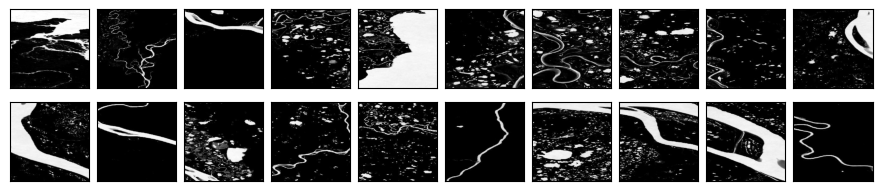

examples of augmentation:


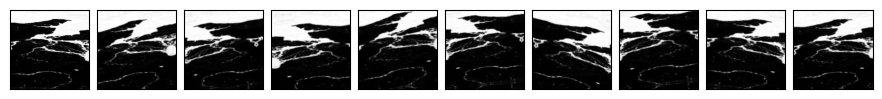

In [4]:
def show_images(images, cols=10, vmin=-.5, vmax=.5, labels=None, scale=1.5, font_size=8):
    cols = min(len(images), cols)
    rows = (len(images) + cols - 1) // cols
    
    fig = plt.figure(figsize=(cols*scale, rows*scale))
    
    for i in range(len(images)):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.subplots_adjust(hspace=.1, wspace=.1, right=.7, top=.7)
        plt.imshow(images[i], cmap='viridis', vmin=vmin, vmax=vmax)
        
        if labels:
            ax.set_title(labels[i], fontsize=font_size, pad=font_size/10)
            plt.subplots_adjust(top=.7+font_size/72)
    
    plt.show()

    
def open_image(path):
    return Image.open(path)

def open_images(paths):
    return [open_image(path) for path in paths]


def show_history(history, names, val_prefix='val_'):
    epochs_count = len(list(history.values())[0])

    fig, ax = plt.subplots(1, len(names), squeeze=False)
    fig.set_figwidth(10)

    for subax, name in zip(ax.ravel(), names):
        subax.plot(range(epochs_count), history[name], label=name)

        if val_prefix + name in history:
            subax.plot(range(epochs_count), history[val_prefix + name], label=val_prefix+name)

        subax.legend()
        subax.grid()
        
    
preprocessor = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation((-.08, +.08), (-.08, +.08), interpolation="bilinear"),
    layers.RandomRotation(.04, interpolation="bilinear"),
    layers.RandomZoom((-.05, +.05), interpolation="bilinear"),
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, interpolation="bilinear"),
    layers.Rescaling(1/255, offset=-.5),
])
        
listdir = sorted(os.listdir(DATASET_PATH))

listdir_fullpath = [os.path.join(DATASET_PATH, filename) for filename in listdir]

print('examples of images:')
show_images(open_images(listdir_fullpath[:20]))

print('examples of augmentation:')
show_images([open_image(listdir_fullpath[0])] +
            [preprocessor(open_image(listdir_fullpath[0])) + .5 for i in range(9)])

Found 1155 files belonging to 13 classes.
Using 1040 files for training.
Using 115 files for validation.


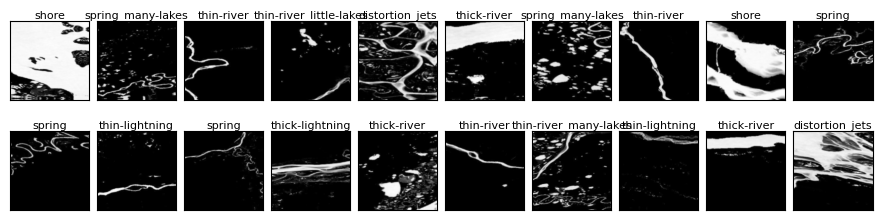

In [5]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    directory=DATASET_CLASSIFIED_PATH,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.1,
    subset="both",
    batch_size=128,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    interpolation='area',
    color_mode='rgb',
    seed=SEED,
    shuffle=True)

train_ds = train_ds.map(lambda x, y: (preprocessor(x), y))
val_ds = val_ds.map(lambda x, y: (preprocessor(x), y))


def ohes_to_labels(ohes):
    return [sorted(hand_sorted.keys())[list(ohe).index(max(ohe))] for ohe in ohes]

for images, labels in train_ds.take(1):
    show_images(images[:20] + .5, labels=ohes_to_labels(labels[:20]))

# based

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 100)               2508900   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 13)                1313      
                                                                 
Total params: 17,235,001
Trainable params: 17,235,001
Non-trainable params: 0
___________________________________________

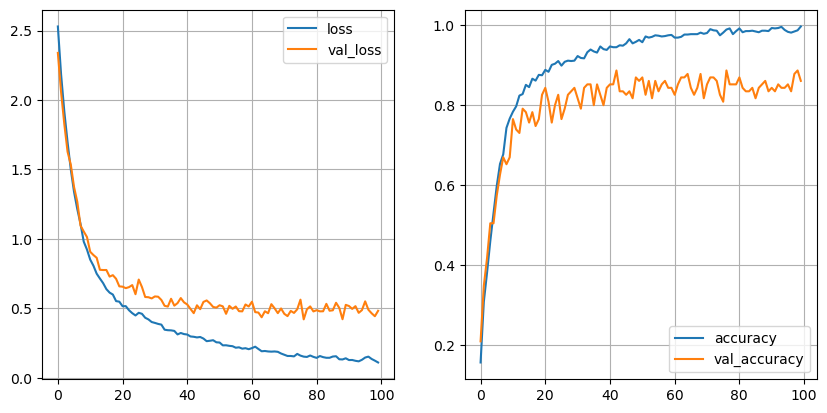

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg16 = VGG16(include_top=False, weights="imagenet", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# for layer in vgg16.layers:
#     layer.trainable = False

vgg_ft = keras.Sequential([
    vgg16,
    layers.Flatten(),
    layers.Dense(100, activation='tanh'),
    layers.Dense(100, activation='tanh'),
    layers.Dense(len(hand_sorted.keys()), activation='softmax'),
])

vgg_ft.summary()
vgg_ft.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])

history = vgg_ft.fit(train_ds, validation_data=val_ds, epochs=100)
show_history(history.history, ['loss', 'accuracy'])

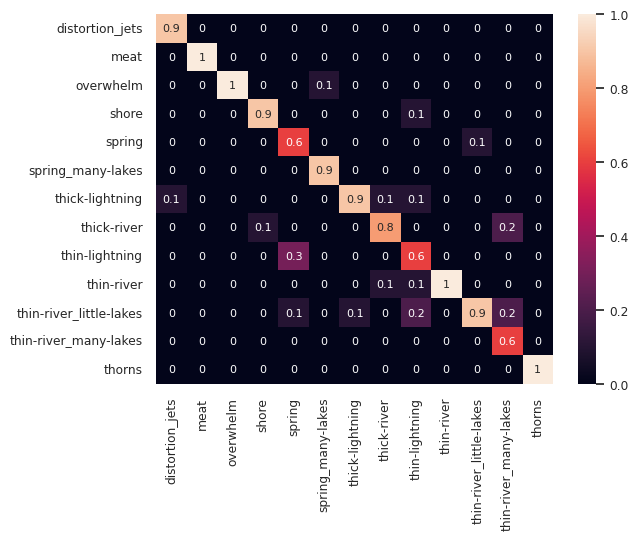

<Figure size 600x600 with 0 Axes>

In [7]:
def show_classifier_confusion_matrix(classifier, dataset, labels):
    y = np.concatenate([y for x, y in dataset], axis=0)
    y = np.argmax(y, axis = 1)
    y_prediction = classifier.predict(dataset, verbose=0)
    y_prediction = np.argmax(y_prediction, axis = 1)
    cm = confusion_matrix(y, y_prediction , normalize='pred', labels=range(len(labels)))
    
    df_cm = pd.DataFrame(cm.round(1), labels, labels)
    sn.set(font_scale=0.8)
    sn.heatmap(df_cm, annot=True, vmin=0, vmax=1, annot_kws={"size": 8})
    
    plt.figure(figsize=(6,6))
    plt.show()
    
    
show_classifier_confusion_matrix(vgg_ft, val_ds, labels=sorted(hand_sorted.keys()))

# predict

Found 10000 files belonging to 1 classes.
79/79 [==============================] - 42s 531ms/step
0 distortion_jets 243


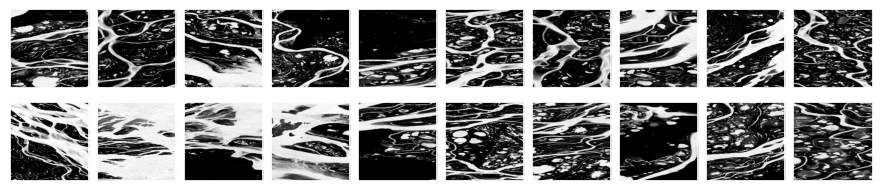

1 meat 482


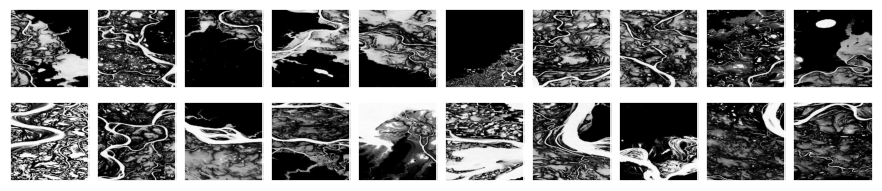

2 overwhelm 50


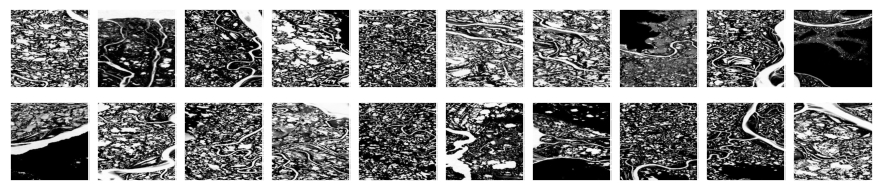

3 shore 576


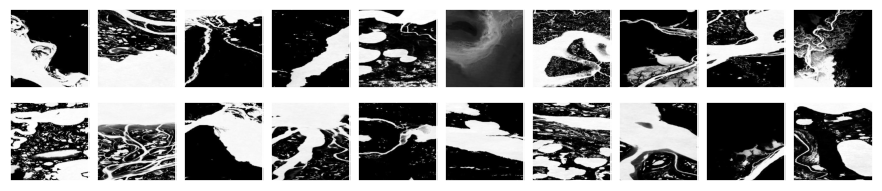

4 spring 1131


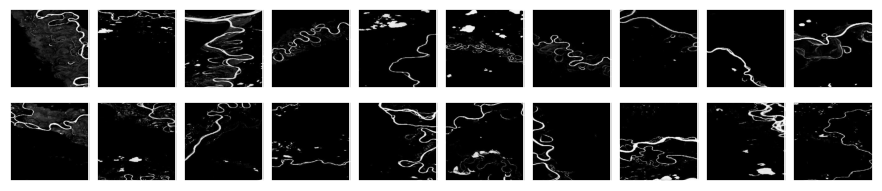

5 spring_many-lakes 1094


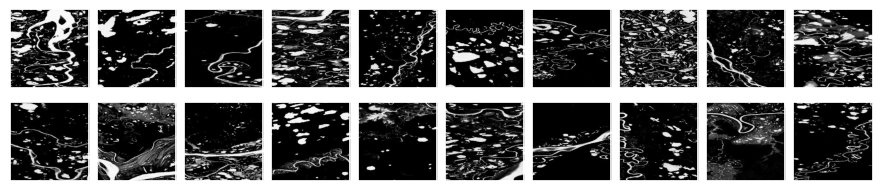

6 thick-lightning 710


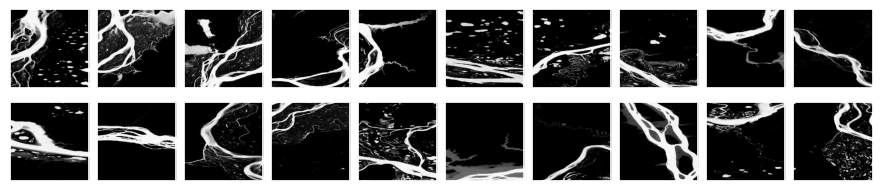

7 thick-river 766


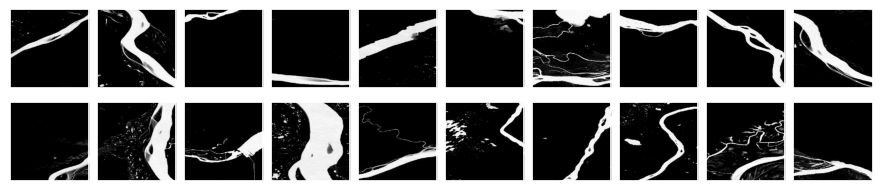

8 thin-lightning 1562


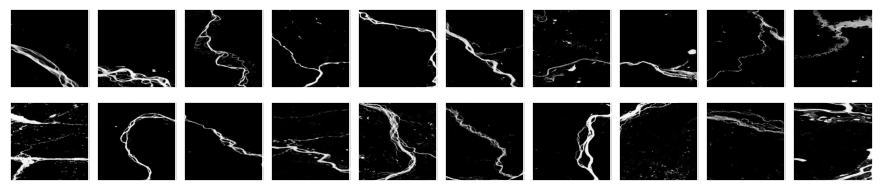

9 thin-river 1002


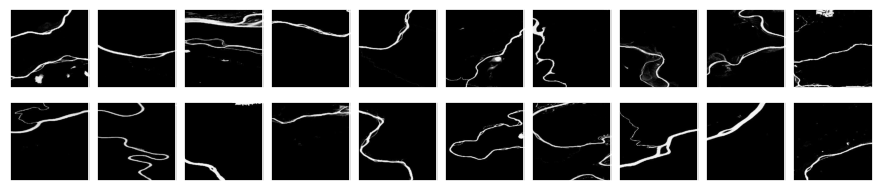

10 thin-river_little-lakes 1060


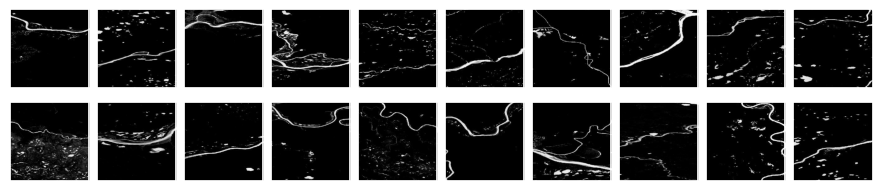

11 thin-river_many-lakes 963


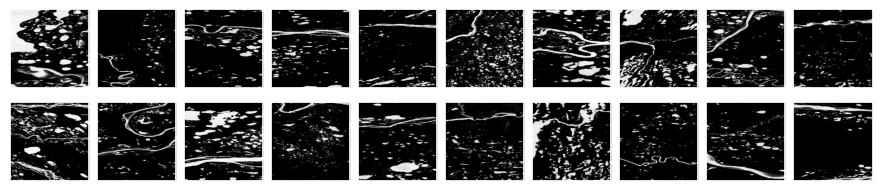

12 thorns 361


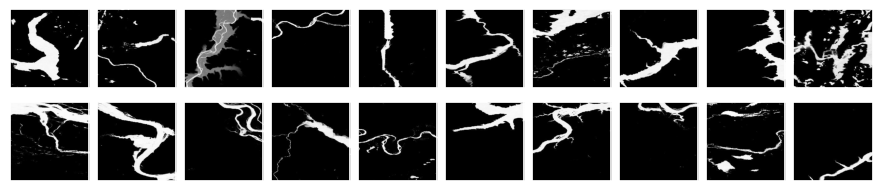

In [8]:
ds_to_classify = keras.utils.image_dataset_from_directory(
    directory=DATASET_PATH,
    label_mode=None,
    batch_size=128,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    interpolation='area',
    color_mode='rgb',
    shuffle=False)

ds_to_classify = ds_to_classify.map(layers.Rescaling(1/255, offset=-.5))

predictions = [list(p).index(max(p)) for p in vgg_ft.predict(ds_to_classify)]

labels = [sorted(hand_sorted.keys())[i] for i in predictions]

submission = zip(listdir, predictions, labels)

pd.DataFrame(submission).to_csv(RESULT_PATH, index=False, header=['file', 'class_int', 'class'])

for idx, label in enumerate(sorted(hand_sorted.keys())):
    indices = [i for i, x in enumerate(predictions) if x == idx]
    images = [Image.open(listdir_fullpath[i]) for i in random.sample(indices, min(len(indices), 20))]
    
    print(idx, label, len(indices))
    
    if len(indices):
        show_images(images)

In [9]:
shutil.rmtree(DATASET_CLASSIFIED_PATH)